# Working on IRIS data set to provide results, by using both Supervised and Unsupervised Learning Machine Learning Models and their Algorithms

In [4]:
# Importing pakages for data processing and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('./Iris.csv')

In [77]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
#information about the data/

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#checking for null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Task 1 - Analyzing the data using Supervised learning Models

### Exploring the data set

#### Oberving Length of Sepal and Petal

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

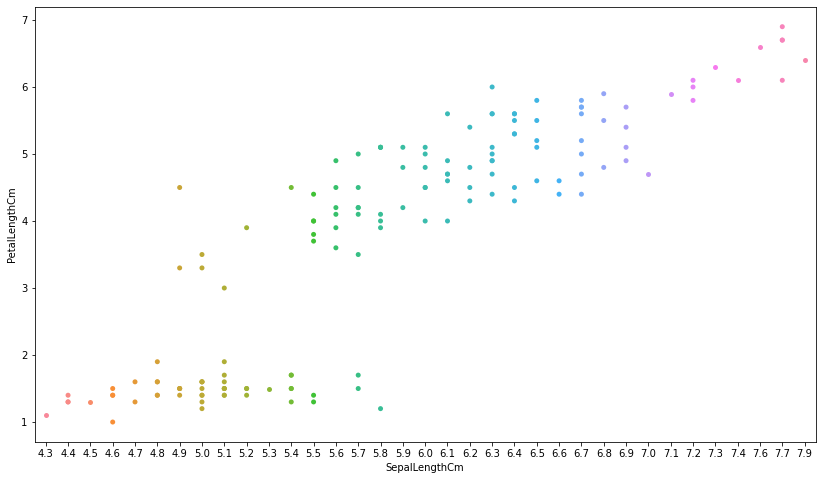

In [13]:
plt.figure(figsize=(14,8))
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
sns.stripplot(x = 'SepalLengthCm', y = 'PetalLengthCm', data = df,jitter = False)

#### Observing Width of Sepal and Petal

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

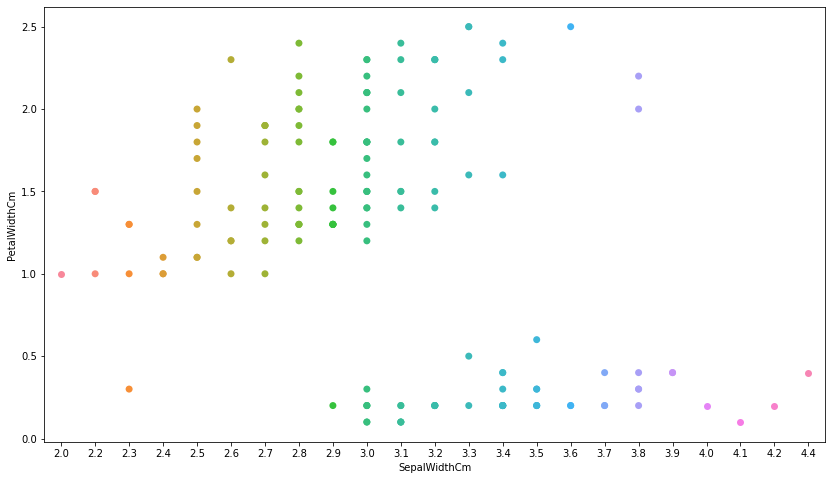

In [20]:
plt.figure(figsize=(14,8))
plt.xlabel('Sepal Width in Cm')
plt.ylabel('Petal Width in Cm')
sns.stripplot(x = 'SepalWidthCm', y = 'PetalWidthCm', data = df,size = 7,jitter = False)

#### Observing Petal Length and Width

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

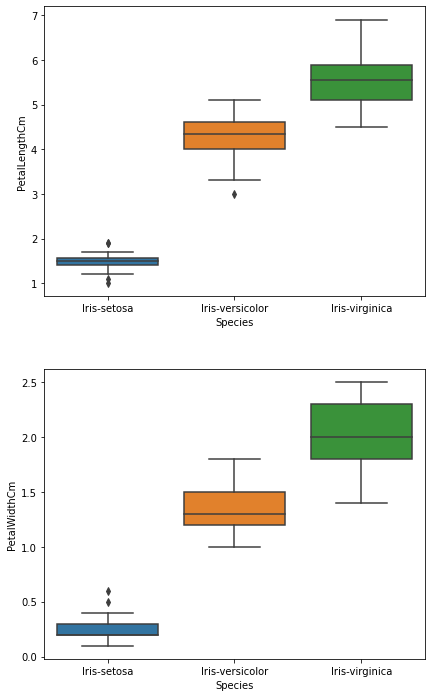

In [17]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace = .25)

plt.subplot(2,2,1)
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

plt.subplot(2,2,3)
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

#### Observing Sepal length and Width

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

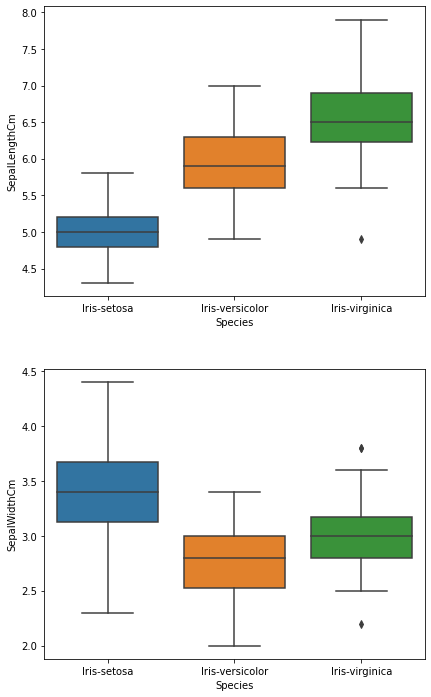

In [19]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace = .25)

plt.subplot(2,2,1)
sns.boxplot(x="Species", y="SepalLengthCm", data=df)

plt.subplot(2,2,3)
sns.boxplot(x="Species", y="SepalWidthCm", data=df)

#### Relationship between variables using multiple visualizations

C:\Users\gruha\miniconda3\envs\ash_off\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


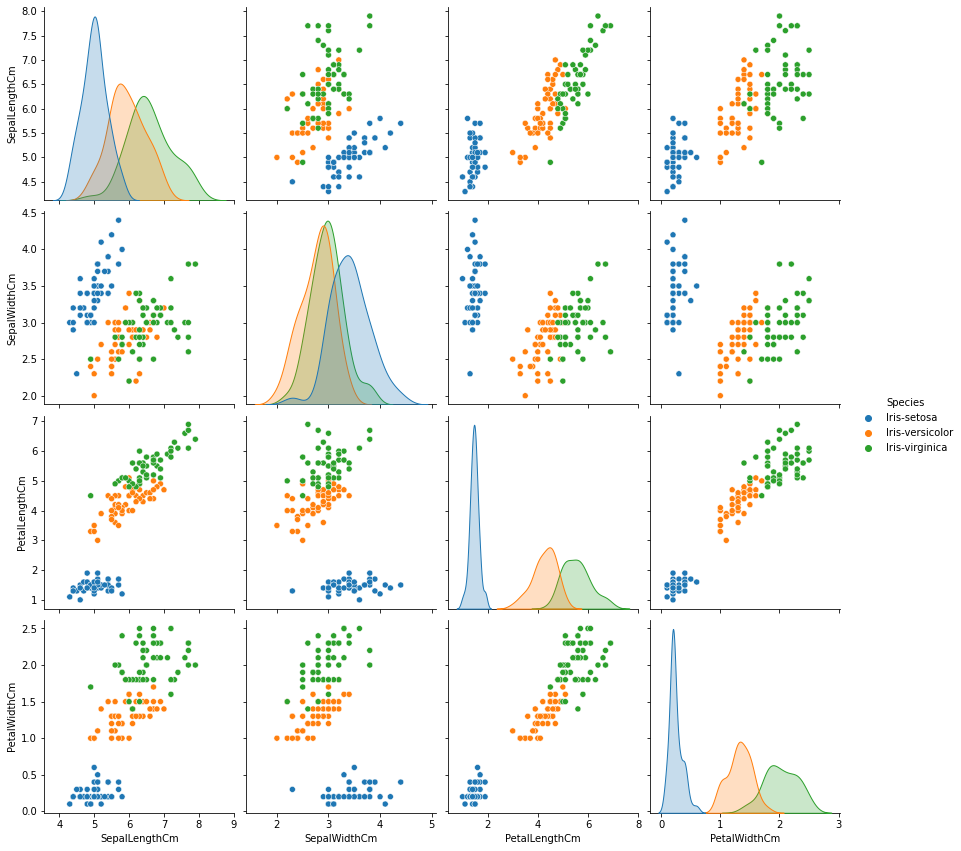

In [21]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)


<AxesSubplot:>

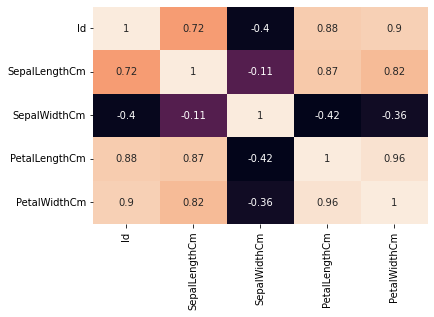

In [22]:
sns.heatmap(cbar=False,annot=True,data=df.corr())

### Data Preprocessing

## Instruction 1 - Split of data as test and training set using Python

In [23]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:4].values
y = df.iloc[:,5].values

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
xtrain=scx.fit_transform(xtrain)
xtest=scx.transform(xtest)

### Modeling

## Instruction 2 - Usage of Classification Model

# using Logistic Regression :

In [27]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(random_state=0)
log_regressor.fit(xtrain,ytrain)


LogisticRegression(random_state=0)

In [28]:
log_predictions = log_regressor.predict(xtest)
log_predictions


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2])

In [29]:
log_accuracy = log_regressor.score(xtest,ytest)
log_accuracy

0.9833333333333333

# using Support Vector Machines :

In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain,ytrain)

SVC()

In [31]:
svc_predictions = svc.predict(xtest)
svc_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2])

In [32]:
svc_accuracy = svc.score(xtest,ytest)
svc_accuracy

0.9833333333333333

# using Naive Bayes :

In [33]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
nbs.fit(xtrain, ytrain)

GaussianNB()

In [34]:
nbs_predictions = nbs.predict(xtest)
nbs_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2])

In [35]:
nbs_accuracy = nbs.score(xtest,ytest)
nbs_accuracy

0.9833333333333333

# using Decision Tree :

In [36]:
from sklearn.tree import DecisionTreeClassifier
dc_tree_classifier = DecisionTreeClassifier()
dc_tree_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [37]:
dc_tree_predictions = dc_tree_classifier.predict(xtest)
dc_tree_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [38]:
dc_tree_accuracy = dc_tree_classifier.score(xtest,ytest)
dc_tree_accuracy

1.0

# using Random Forest :

In [39]:
from sklearn.ensemble import RandomForestClassifier
rn_forest_classifier = RandomForestClassifier()
rn_forest_classifier.fit(xtrain, ytrain)


RandomForestClassifier()

In [40]:
rn_forest_predictions = rn_forest_classifier.predict(xtest)
rn_forest_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2])

In [41]:
rn_forest_accuracy = rn_forest_classifier.score(xtest,ytest)
rn_forest_accuracy

0.9833333333333333

## Instruction 3 - Observing the Models and the results

In [44]:
#models used
Models = ['Logistic Regression','Support Vector Machines','Naive Bayes','Decision Tree', 'Random Forest']

In [49]:
Accuracy = []

score = [log_accuracy,svc_accuracy, nbs_accuracy, dc_tree_accuracy, rn_forest_accuracy]

for i in score :
    Accuracy.append(round(i*100))

In [50]:
Performance_of_Models = pd.DataFrame({'Model' : Models , 'Score' : Accuracy}).sort_values(by='Score', ascending=False)

In [52]:
Performance_of_Models

,Model,Score
3,Decision Tree,100
0,Logistic Regression,98
1,Support Vector Machines,98
2,Naive Bayes,98
4,Random Forest,98


## Instruction 4 - Creating and viewing the reuslts in Confusion Matrix

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
matrix1 = confusion_matrix(ytest, log_predictions) 
matrix2 = confusion_matrix(ytest, svc_predictions) 
matrix3 = confusion_matrix(ytest, rn_forest_predictions) 

In [55]:
df1 = pd.DataFrame(matrix1,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

df2 = pd.DataFrame(matrix2,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

df3 = pd.DataFrame(matrix3,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

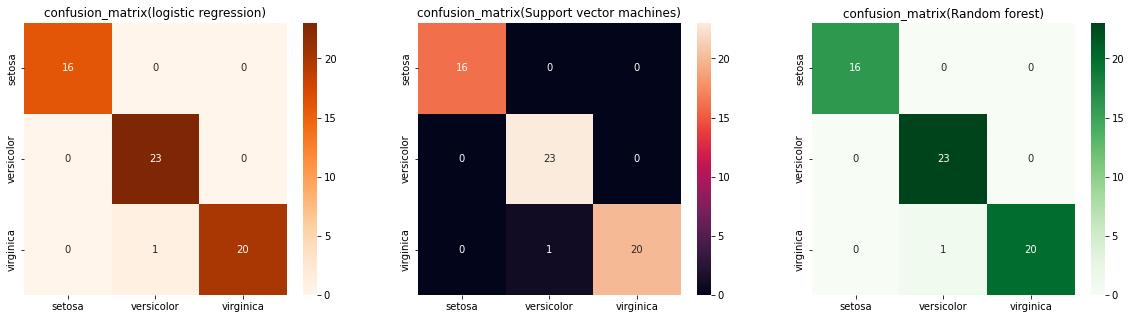

In [56]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace = .25)

plt.subplot(1,3,1)
plt.title('confusion_matrix(logistic regression)')
sns.heatmap(df1, annot=True,cmap='Oranges')

plt.subplot(1,3,2)
plt.title('confusion_matrix(Support vector machines)')
sns.heatmap(df2, annot=True)

plt.subplot(1,3,3)
plt.title('confusion_matrix(Random forest)')
sns.heatmap(df3, annot=True,cmap='Greens')

plt.show()

# Task 2 - Analyzing the data using K-means Clustring 

In [63]:
from sklearn.cluster import KMeans

In [64]:
iris_data=load_iris()

In [69]:
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [70]:
print(kmeans.cluster_centers_)

[[ 25.5     5.006   3.418   1.464]
 [125.5     6.588   2.974   5.552]
 [ 75.5     5.936   2.77    4.26 ]]


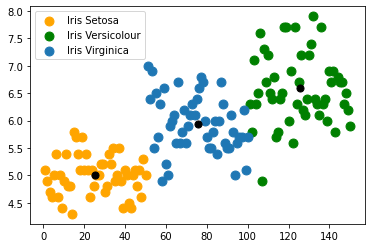

In [76]:
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 80, c = 'orange', label = 'Iris Setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 80, c = 'green', label = 'Iris Versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 80, label = 'Iris Virginica')

plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 50, c = 'black')

plt.legend()
plt.show()